In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df= pd.read_csv('../data/final/cleaned_nontransformed.csv', low_memory=False)
df.shape

(229770, 54)

In [3]:
df.shape

(229770, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229770 entries, 0 to 229769
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   station_id                   229770 non-null  float64
 1   date                         229770 non-null  object 
 2   station_name                 229770 non-null  object 
 3   station_lat                  229770 non-null  float64
 4   station_long                 229770 non-null  float64
 5   station_nts                  229770 non-null  object 
 6   station_boro                 229770 non-null  object 
 7   city                         229770 non-null  object 
 8   day                          229770 non-null  int64  
 9   dayofweek                    229770 non-null  int64  
 10  dayofyear                    229770 non-null  int64  
 11  week                         229770 non-null  int64  
 12  weekend                      229770 non-null  int64  
 13 

In [5]:
df['station_id'].value_counts()

3704.08    621
5575.13    621
5721.14    621
5779.09    621
5746.14    621
          ... 
4663.06    621
4623.02    621
4861.05    621
4748.07    621
7967.04    621
Name: station_id, Length: 370, dtype: int64

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load the time series data
d= df[df['station_id']==3704.08]
d['date']= pd.to_datetime(d['date'])
d= d.set_index('date')
# Fit the simple exponential smoothing model
fit = SimpleExpSmoothing(d[['target_ridecount_outflow']]).fit()

d['smoothT']= fit.fittedvalues
# Generate the forecasts for the next 3 periods

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\ipykernel_48412\260654742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['date']= pd.to_datetime(d['date'])
c:\Users\31405.ISBDOMAIN1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [24]:
d[['smoothT', 'target_ridecount_outflow']]

,smoothT,target_ridecount_outflow
date,,
2021-02-02,10.546372,2.0
2021-02-03,9.380616,2.0
2021-02-04,8.373873,6.0
2021-02-05,8.050068,11.0
2021-02-06,8.452449,37.0
...,...,...
2022-10-11,18.395957,30.0
2022-10-12,19.978790,19.0
2022-10-13,19.845280,12.0


In [25]:
d.reset_index(inplace=True)

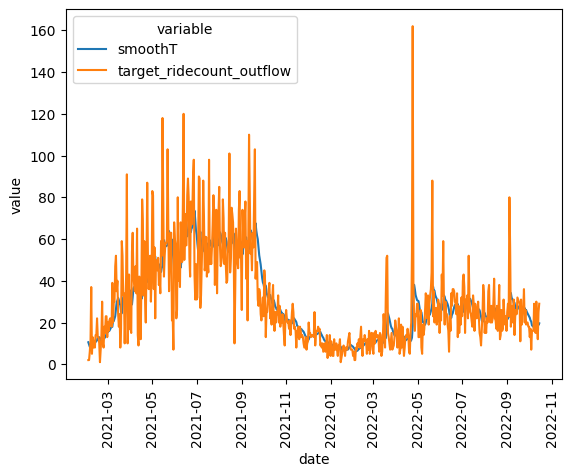

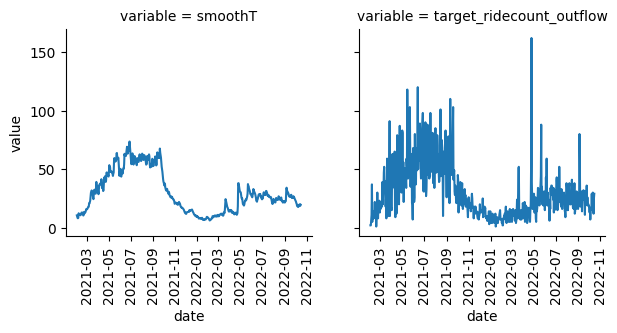

In [27]:
import seaborn as sns
# convert dataframe from wide format to long format
df_melt = pd.melt(d[['date',"smoothT", "target_ridecount_outflow"]], id_vars=['date'], var_name='variable', value_name='value')

# plot all the variables on the same chart
sns.lineplot(x='date', y='value', hue='variable', data=df_melt)
# display the chart
plt.xticks(rotation=90)
plt.show()

g = sns.FacetGrid(data=df_melt, col="variable", col_wrap=6)
g.map(sns.lineplot, "date", "value")
g.set_xticklabels(rotation=90)
plt.show()

# Data Regularization

In [29]:
d.shape

(621, 55)

In [30]:
df.shape

(229770, 54)

In [31]:
dff= d.copy()

In [33]:
d.columns

Index(['date', 'station_id', 'station_name', 'station_lat', 'station_long',
       'station_nts', 'station_boro', 'city', 'day', 'dayofweek', 'dayofyear',
       'week', 'weekend', 'month', 'month_year', 'year',
       'target_ridecount_outflow', 'neighbor_rco_T', 'boro_rco_T',
       'city_rco_T', 'nyc_gasprice_avg', 'nyc_gasprice_avg_stdS',
       'nyc_gasprice_avg_mmS', 'retail_traffic', 'grocery_pharma_traffic',
       'parks_traffic', 'transit_traffic', 'workplace_traffic',
       'residential_traffic', 'retail_traffic_stdS',
       'grocery_pharma_traffic_stdS', 'parks_traffic_stdS',
       'transit_traffic_stdS', 'workplace_traffic_stdS',
       'residential_traffic_stdS', 'retail_traffic_mmS',
       'grocery_pharma_traffic_mmS', 'parks_traffic_mmS',
       'transit_traffic_mmS', 'workplace_traffic_mmS',
       'residential_traffic_mmS', 'traffic_stdS_PC1', 'traffic_stdS_PC2',
       'day_condition', 'temp_min', 'temp_max', 'temp_mean', 'precipprob_max',
       'visibility_min'

In [39]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='target_ridecount_outflow ~ year+month+day+dayofweek+dayofyear+week+weekend+month+nyc_gasprice_avg+retail_traffic+grocery_pharma_traffic+parks_traffic+transit_traffic+workplace_traffic+residential_traffic+temp_mean+precipprob_max+visibility_mean+uvindex_max', data=d)
m= mod.fit()
m.params

Intercept                 28625.111099
year                        -14.146698
month                        68.326998
day                           2.249177
dayofweek                     0.553833
dayofyear                    -2.307463
week                         -0.155537
weekend                      -3.976702
nyc_gasprice_avg            -11.730458
retail_traffic                0.385349
grocery_pharma_traffic       -0.238611
parks_traffic                 0.279407
transit_traffic               0.438126
workplace_traffic            -0.535780
residential_traffic          -1.386633
temp_mean                     0.090257
precipprob_max                0.905735
visibility_mean              -1.430930
uvindex_max                   0.298205
dtype: float64

In [40]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     target_ridecount_outflow   R-squared:                       0.698
Model:                                  OLS   Adj. R-squared:                  0.689
Method:                       Least Squares   F-statistic:                     77.31
Date:                      Sat, 29 Apr 2023   Prob (F-statistic):          3.19e-143
Time:                              16:15:30   Log-Likelihood:                -2445.6
No. Observations:                       621   AIC:                             4929.
Df Residuals:                           602   BIC:                             5013.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.863e+04   5389.961      5.311      0.000     1.8e+04    3.92e+04
year                     -14.1467      2.663     -5.313      0.000     -19.376      -8.917
month                     68.3270     29.566      2.311      0.021      10.262     126.392
day                        2.2492      0.975      2.306      0.021       0.334       4.165
dayofweek                  0.5538      0.437      1.268      0.205      -0.304       1.412
dayofyear                 -2.3075      0.972     -2.374      0.018      -4.217      -0.398
week                      -0.1555      0.182     -0.855      0.393      -0.513       0.202
weekend                   -3.9767      3.091     -1.286      0.199     -10.048       2.094
nyc_gasprice_avg         -11.7305      1.713     -6.848      0.000     -15.095      -8.366
retail_traffic             0.3853      0.173      2.223      0.027       0.045       0.726
grocery_pharma_traffic    -0.2386      0.157     -1.521      0.129      -0.547       0.069
parks_traffic              0.2794      0.042      6.712      0.000       0.198       0.361
transit_traffic            0.4381      0.294      1.492      0.136      -0.139       1.015
workplace_traffic         -0.5358      0.182     -2.940      0.003      -0.894      -0.178
residential_traffic       -1.3866      0.499     -2.779      0.006      -2.366      -0.407
temp_mean                  0.0903      0.068      1.328      0.185      -0.043       0.224
precipprob_max             0.9057      1.202      0.753      0.451      -1.455       3.267
visibility_mean           -1.4309      0.702     -2.038      0.042      -2.810      -0.052
uvindex_max                0.2982      0.308      0.967      0.334      -0.307       0.904
==============================================================================
Omnibus:                      330.763   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6319.422
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                      18.149   Cond. No.                     2.16e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt 
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import statsmodels.api as sm


In [43]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [44]:
d.columns

Index(['date', 'station_id', 'station_name', 'station_lat', 'station_long',
       'station_nts', 'station_boro', 'city', 'day', 'dayofweek', 'dayofyear',
       'week', 'weekend', 'month', 'month_year', 'year',
       'target_ridecount_outflow', 'neighbor_rco_T', 'boro_rco_T',
       'city_rco_T', 'nyc_gasprice_avg', 'nyc_gasprice_avg_stdS',
       'nyc_gasprice_avg_mmS', 'retail_traffic', 'grocery_pharma_traffic',
       'parks_traffic', 'transit_traffic', 'workplace_traffic',
       'residential_traffic', 'retail_traffic_stdS',
       'grocery_pharma_traffic_stdS', 'parks_traffic_stdS',
       'transit_traffic_stdS', 'workplace_traffic_stdS',
       'residential_traffic_stdS', 'retail_traffic_mmS',
       'grocery_pharma_traffic_mmS', 'parks_traffic_mmS',
       'transit_traffic_mmS', 'workplace_traffic_mmS',
       'residential_traffic_mmS', 'traffic_stdS_PC1', 'traffic_stdS_PC2',
       'day_condition', 'temp_min', 'temp_max', 'temp_mean', 'precipprob_max',
       'visibility_min'

In [ ]:
lin_regressor = LinearRegression()
mse= cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
i=0
rigdereg=Ridge()
y = d['target_ridecount_outflow']
X = d.drop(['target_ridecount_outflow'], axis=1)
scaler= StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
rigdereg(X,y)
#lassoreg(X,y)
lin_regressor = LinearRegression()
mse= cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)